In [31]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [32]:
flag = True
for i in tqdm(range(3200)):
    d = "/media/lfc/ボリューム/M1/result/2022_01_23/piv/gx_48_gy_48_t_24_s_48_th_60/cbi_q_55/"
    if flag:
        flag = False
        dx = np.loadtxt(d + f"dx_{i}_{i+1}.csv", delimiter=',')
        dy = np.loadtxt(d + f"dy_{i}_{i+1}.csv", delimiter=',')
    else:
        dx = np.nansum([dx, np.loadtxt(d + f"dx_{i}_{i+1}.csv", delimiter=',')], axis=0)
        dy = np.nansum([dy, np.loadtxt(d + f"dy_{i}_{i+1}.csv", delimiter=',')], axis=0)

dx /= 3200
dy /= 3200


100%|██████████| 3200/3200 [01:48<00:00, 29.49it/s]


In [33]:
width, height = 570, 512
n = 48

x, y = np.meshgrid(np.linspace(0, width, n, dtype="int"), np.linspace(0, height, n, dtype="int"))

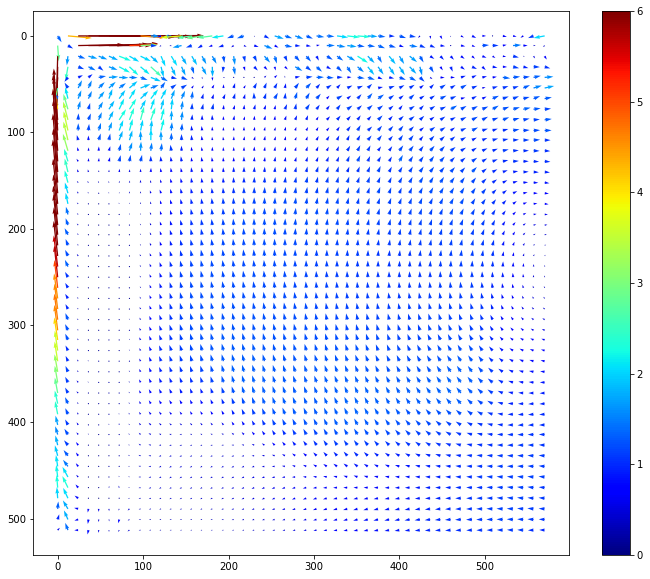

In [34]:
fig, ax = plt.subplots(figsize=(12, 10))
c = np.sqrt(dx**2 + dy**2)
im = ax.quiver(x, y, dx, -dy, c, cmap="jet")
ax.invert_yaxis()
fig.colorbar(im)
im.set_clim(0, 6)
plt.show()